In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [4]:
def load_gzipped_numpy(filename):
    try:
        with gzip.open(filename, 'rb') as f:
            return np.load(f, allow_pickle=True)
    except FileNotFoundError:
        return [0]

In [5]:
pop = np.loadtxt('pop_new.csv')

In [6]:
rs = np.array([20, 10, 2.0, 1.0, 0.5, 0.2, 0.1, 0.05, 0.025])

In [7]:
len_r = len(rs)

In [178]:
18*9

162

In [8]:
Ensembles = np.zeros((len(rs),300,3142,60))

In [9]:
R0 = 2.5
export_dir = '/Users/qingyao/Documents/branching_data/simulation/python_cutoff/'
for r_idx in range(len_r):
#     print(r_idx)
    r = rs[r_idx]
    sub_export_dir = export_dir+'branching_R0-{}_r-{}/'.format(np.round(R0,2),np.round(r,3))
    for i in range(300):
        export_names = sub_export_dir+'NewInf_R0-{}_r-{}_{}.npy.gz'.format(np.round(R0,2),np.round(r,3),(i+1))
        temp = load_gzipped_numpy(export_names)
        if len(temp) == 1:
            print(r, i)
        else:
            Ensembles[r_idx,i,:,:] = temp

In [10]:
## to check whether there are cases the disease die out
for r_idx in range(len_r):
#     print(r_idx)
    r = rs[r_idx]
    En_i = Ensembles[r_idx,:,:,:]
#     position 
    if np.sum(En_i[:,:,-1]<1) != 0:
        print(r)

20.0
10.0
2.0
1.0
0.5
0.2
0.1
0.05
0.025


In [13]:
Ensembles_0 = copy.deepcopy(Ensembles)
Ensembles_0[Ensembles_0 == 0] = 0.000000000000001
Ensembles_log = np.log(Ensembles_0)

In [14]:
M_r_logNewinfect_avg = np.average(Ensembles_log,axis=1)
M_r_logNewinfect_std = np.std(Ensembles_log,axis=1)

In [140]:
M_r_logNewinfect_avg.shape

(9, 3142, 60)

In [11]:
import networkx as nx
WN = np.loadtxt('W_avg.csv')
g_m = nx.from_numpy_array(WN)
g_m.remove_edges_from(nx.selfloop_edges(g_m))
neighbours = list(g_m.neighbors(1858))
second_neighbours = []
for n in neighbours:
    s_n = list(g_m.neighbors(n))
    second_neighbours.extend(s_n)
second_neighbours = list(set(second_neighbours))
all_neighbours = neighbours + second_neighbours

In [26]:
degree_coun

Counter({(0, 4): 1,
         (1, 3): 1,
         (2, 6): 1,
         (3, 2): 1,
         (4, 4): 1,
         (5, 3): 1,
         (6, 3): 1,
         (7, 8): 1,
         (8, 5): 1,
         (9, 3): 1,
         (10, 3): 1,
         (11, 2): 1,
         (12, 5): 1,
         (13, 3): 1,
         (14, 1): 1,
         (15, 5): 1,
         (16, 6): 1,
         (17, 3): 1,
         (18, 2): 1,
         (19, 5): 1,
         (20, 4): 1,
         (21, 7): 1,
         (22, 5): 1,
         (23, 5): 1,
         (24, 4): 1,
         (25, 6): 1,
         (26, 7): 1,
         (27, 8): 1,
         (28, 3): 1,
         (29, 7): 1,
         (30, 3): 1,
         (31, 2): 1,
         (32, 2): 1,
         (33, 3): 1,
         (34, 7): 1,
         (35, 4): 1,
         (36, 15): 1,
         (37, 3): 1,
         (38, 6): 1,
         (39, 6): 1,
         (40, 9): 1,
         (41, 6): 1,
         (42, 3): 1,
         (43, 4): 1,
         (44, 9): 1,
         (45, 3): 1,
         (46, 5): 1,
         (47, 7): 1,
 

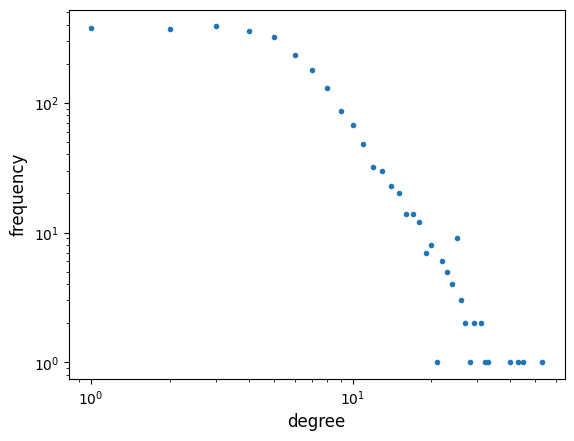

In [40]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

# G = some networkx graph

degrees = list(dict(g_m.degree(list(range(g_m.number_of_nodes())))).values())
# g_m.degree(list(range(g_m.number_of_nodes())))
degree_counts = Counter(degrees)                                                                                                 
x, y = zip(*degree_counts.items())                                                      
                                                                                                 
plt.figure(1)   
                                                                                                                                                                                                                                                      
# prep axes                                                                                                                      
plt.xlabel('degree',size=12)                                                                                                             
plt.xscale('log')                                                                                                                
# plt.xlim(1, max(x))  
                                                                                                           
plt.ylabel('frequency',size=12)                                                                                                          
plt.yscale('log')                                                                                                                
# plt.ylim(1, max(y))                                                                                                             
                                                                                                                                     # do plot                                                                                                                        
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()

In [12]:
# position = list(set(neighbours))
position = list(set(all_neighbours))

In [16]:
indices = np.array(range(10))  # This is 0 to 9
matrix = np.full((3, 3), np.nan)
matrix[:indices.size//3, :] = indices[:9].reshape((-1, 3))
print(matrix)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [17]:
rs[8]

0.025

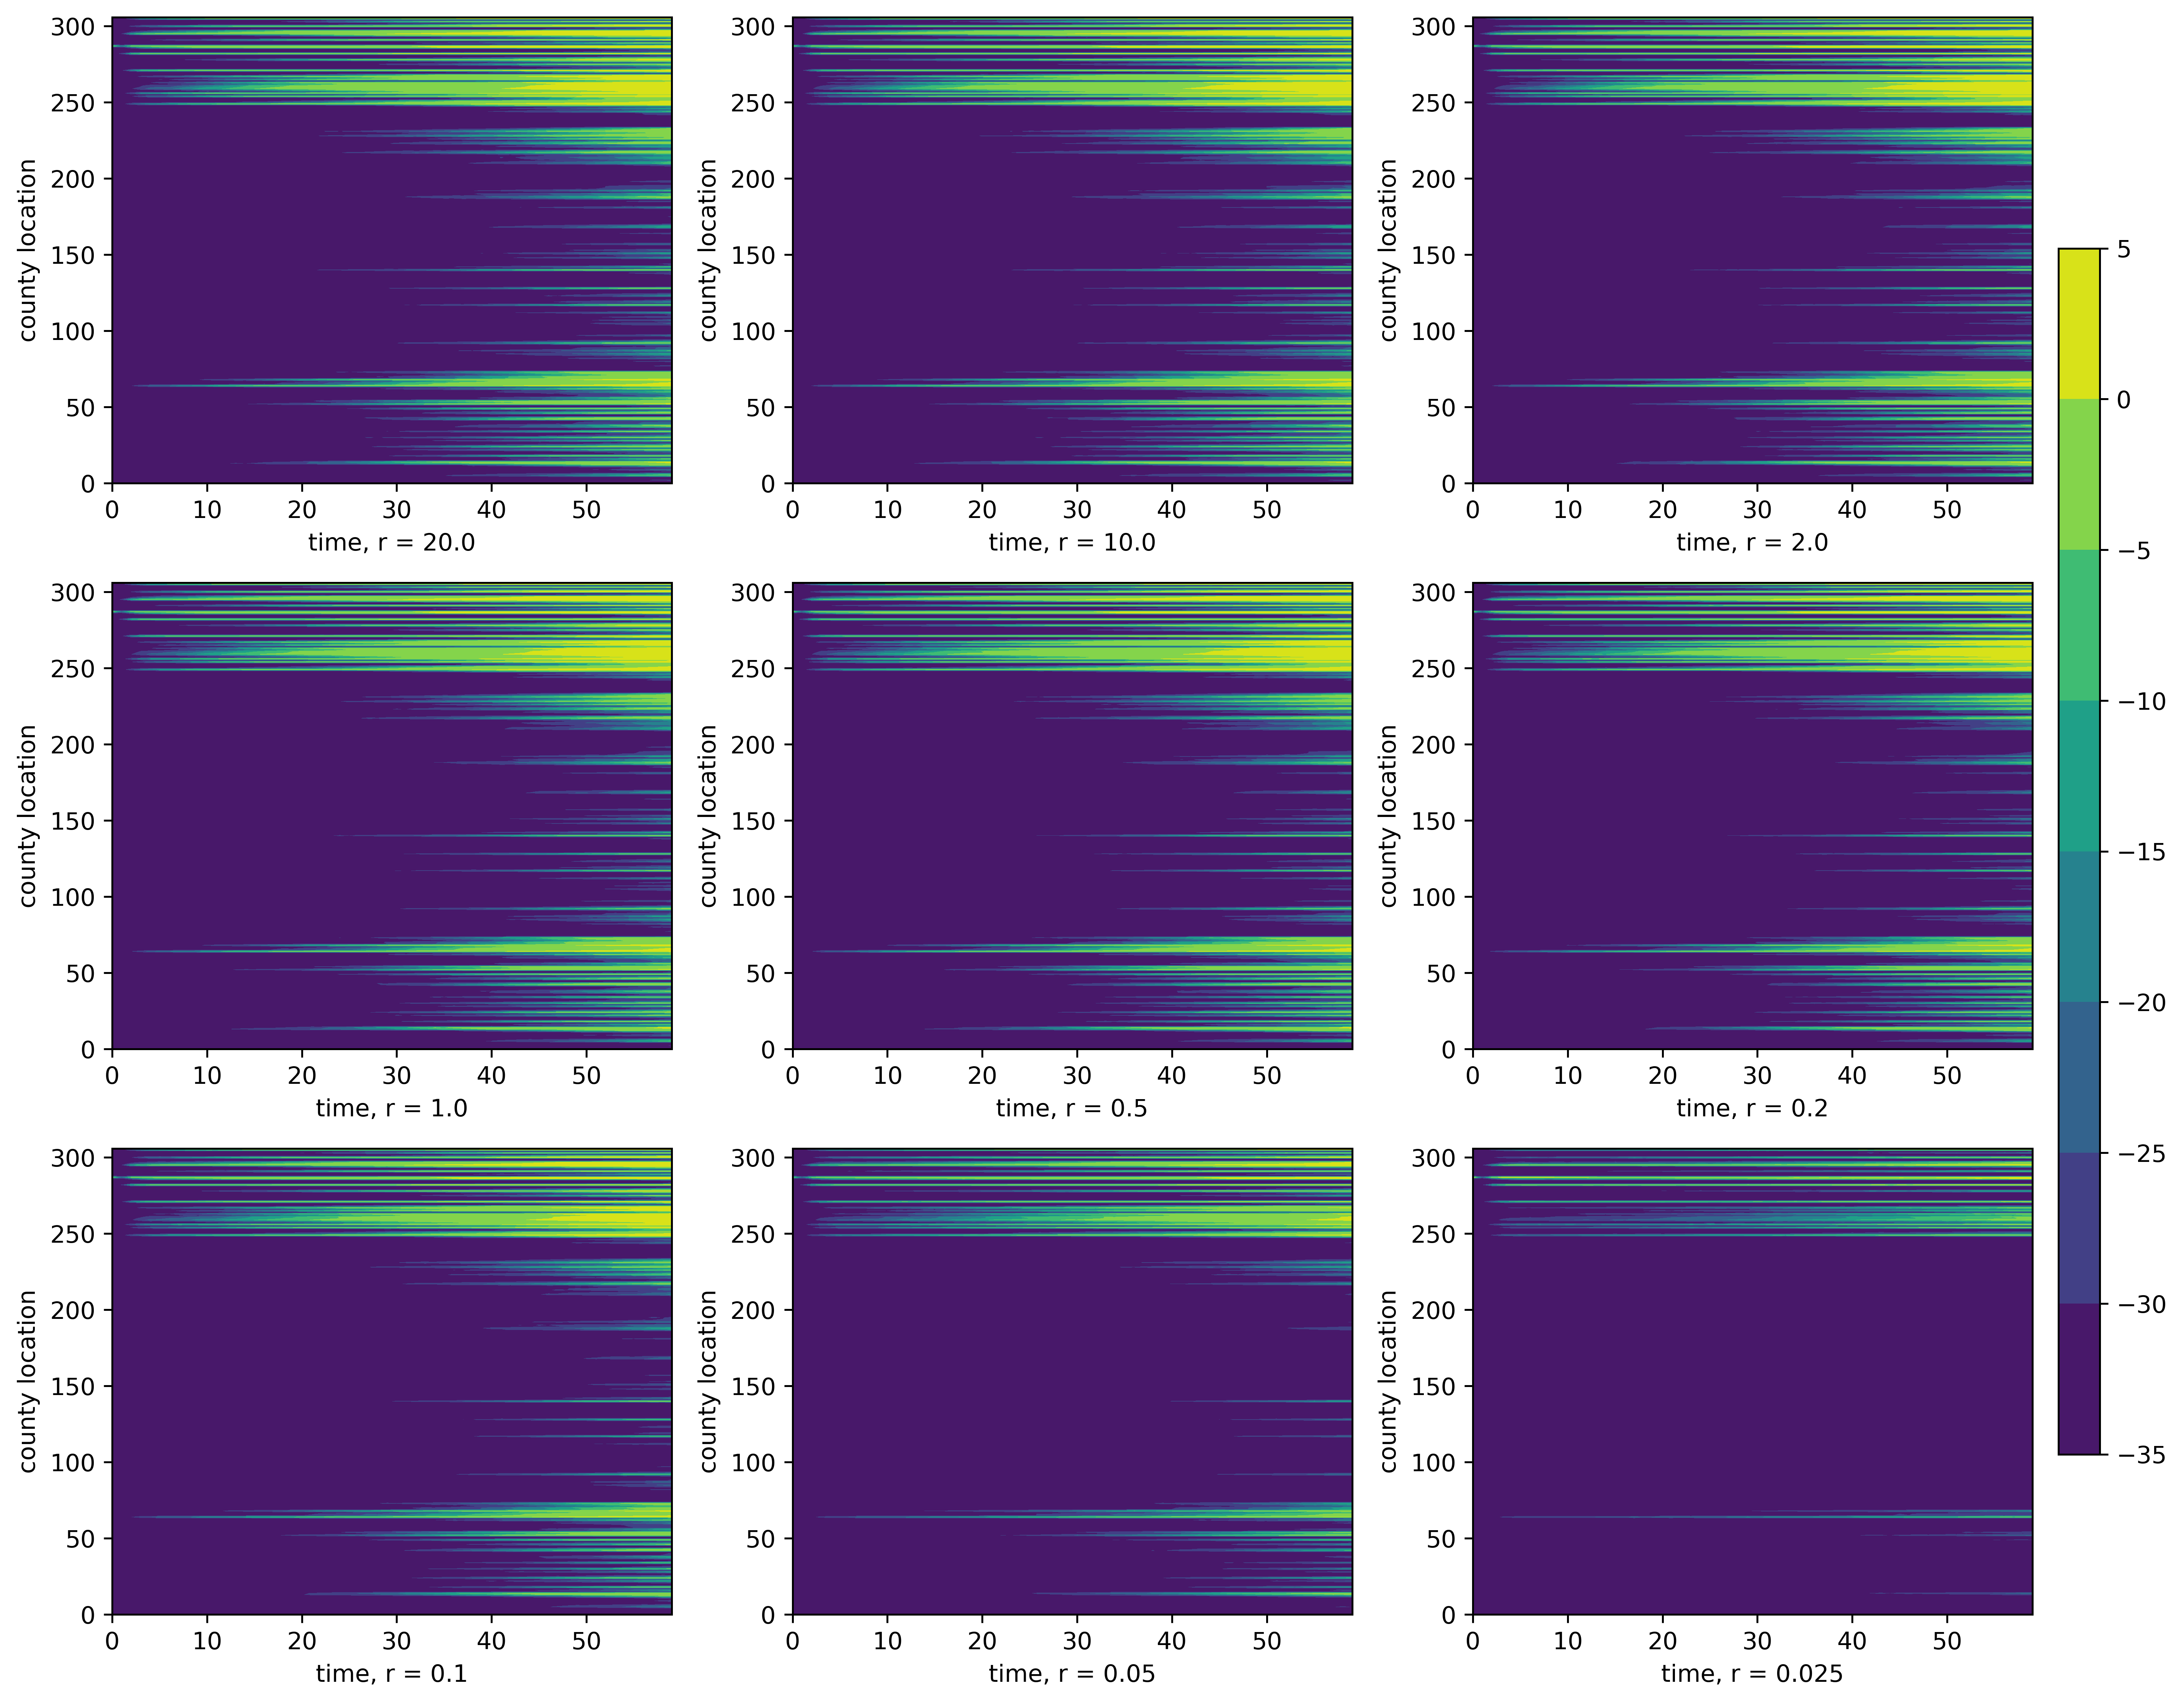

In [18]:
x = np.array(range(60))
y = np.array(range(307))
X, Y = np.meshgrid(x, y)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), dpi=450)

for i in range(3):
    for j in range(3):
        r_idx = np.int64(matrix[i,j])
        Z = M_r_logNewinfect_avg[r_idx,position,:]
        ax_i = axes[i, j]
        contour = ax_i.contourf(X, Y, Z, cmap=plt.cm.viridis)
        axes[i, j].set_xlabel('time, r = {}'.format(rs[r_idx]))
        axes[i, j].set_ylabel('county location')
        

fig.tight_layout()
cbar_ax = plt.axes([1, 0.15, 0.02, 0.7])
fig.colorbar(contour, cax=cbar_ax, orientation='vertical')
# fig1, ax2 = plt.subplots(figsize=(5, 4), dpi=450)
 #vmax=36

# cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
# plt.xlabel('time')
# plt.ylabel('daily new infections')

In [78]:
color_map = []
for node in g_m:
    if node in position[0]:
        color_map.append('black')
    else: 
        color_map.append('gray')  # color other nodes red

TypeError: argument of type 'int' is not iterable

In [79]:
color_map[1859-1]='red'

IndexError: list assignment index out of range

In [80]:
# pos = nx.spring_layout(g_m,k=0.01)
pos = nx.circular_layout(g_m)
# pos = nx.shell_layout(g_m)

In [81]:
edge_weights = nx.get_edge_attributes(g_m, "weight")
edge_width = np.array(list(edge_weights.values()))*2

In [82]:
plt.figure(figsize=(10,10),dpi=450)
nx.draw_networkx(g_m,with_labels=False,node_size=1,node_color=color_map,pos=pos,width=edge_width)

In [158]:
mean_r = M_r_logNewinfect_avg[1,position,:]
std_r = M_r_logNewinfect_std[1,position,:]

observed_ts = Ensembles_log[1,0,:,:]
mle_matrix = observed_ts[position]
    #     std_r_ma = mean_county_r*0.1+1
M_likelihood = SSA.norm.pdf(mle_matrix, scale=std_r, loc=mean_r)
M_likelihood[M_likelihood==0]=0.0000001

# weight = WN[position,1858]

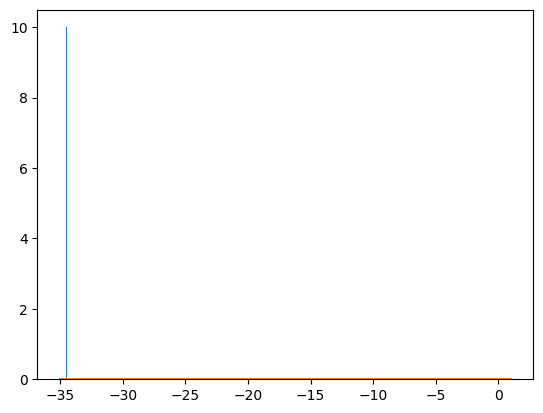

In [159]:
x = np.linspace(-35,1,100)
y = SSA.norm.pdf(x, scale=std_r[0,-1], loc=mean_r[0,-1])
plt.hist(mle_matrix[0,-1],density=True)
plt.plot(x,y)

In [160]:
m_p = (WN+WN2)[:,1858]#WN[:,1858]
m_log = np.log(M_likelihood) #

In [161]:
WN2 = np.dot(WN, WN)
WN3 = WN@WN@WN

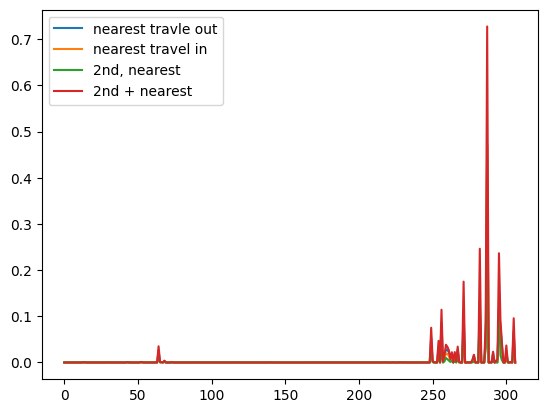

In [162]:
plt.plot(WN2[position,1858],label='nearest travle out')
plt.plot(WN[1858,position],label='nearest travel in')
plt.plot(WN[position,1858],label='2nd, nearest')
plt.plot((WN+WN2)[position,1858],label='2nd + nearest')
plt.legend()

In [163]:
# plt.figure(figsize=(2,8))

plt.subplot(2, 1, 1)
plt.plot( range(307), m_p[position],label='mobility_prob')
plt.ylabel('Mobility Prob')
plt.legend()

# Second subplot for 'likelihood_position'
lk = np.sum(M_likelihood[:,10:], axis=1) # m_log
plt.subplot(2, 1, 2)
plt.plot(range(307), lk*m_p[position], label='likelihood_position*(m_p^2+m_p)', color='purple') # *m_p[position]
plt.xlabel('X data')
plt.ylabel('Likelihood Position')
plt.legend()

# Adjust spacing between subplots for better layout
plt.tight_layout()

# Display the plots
plt.show()

Text(0.5, 1.0, 'r_pos=10,r_prior=10')

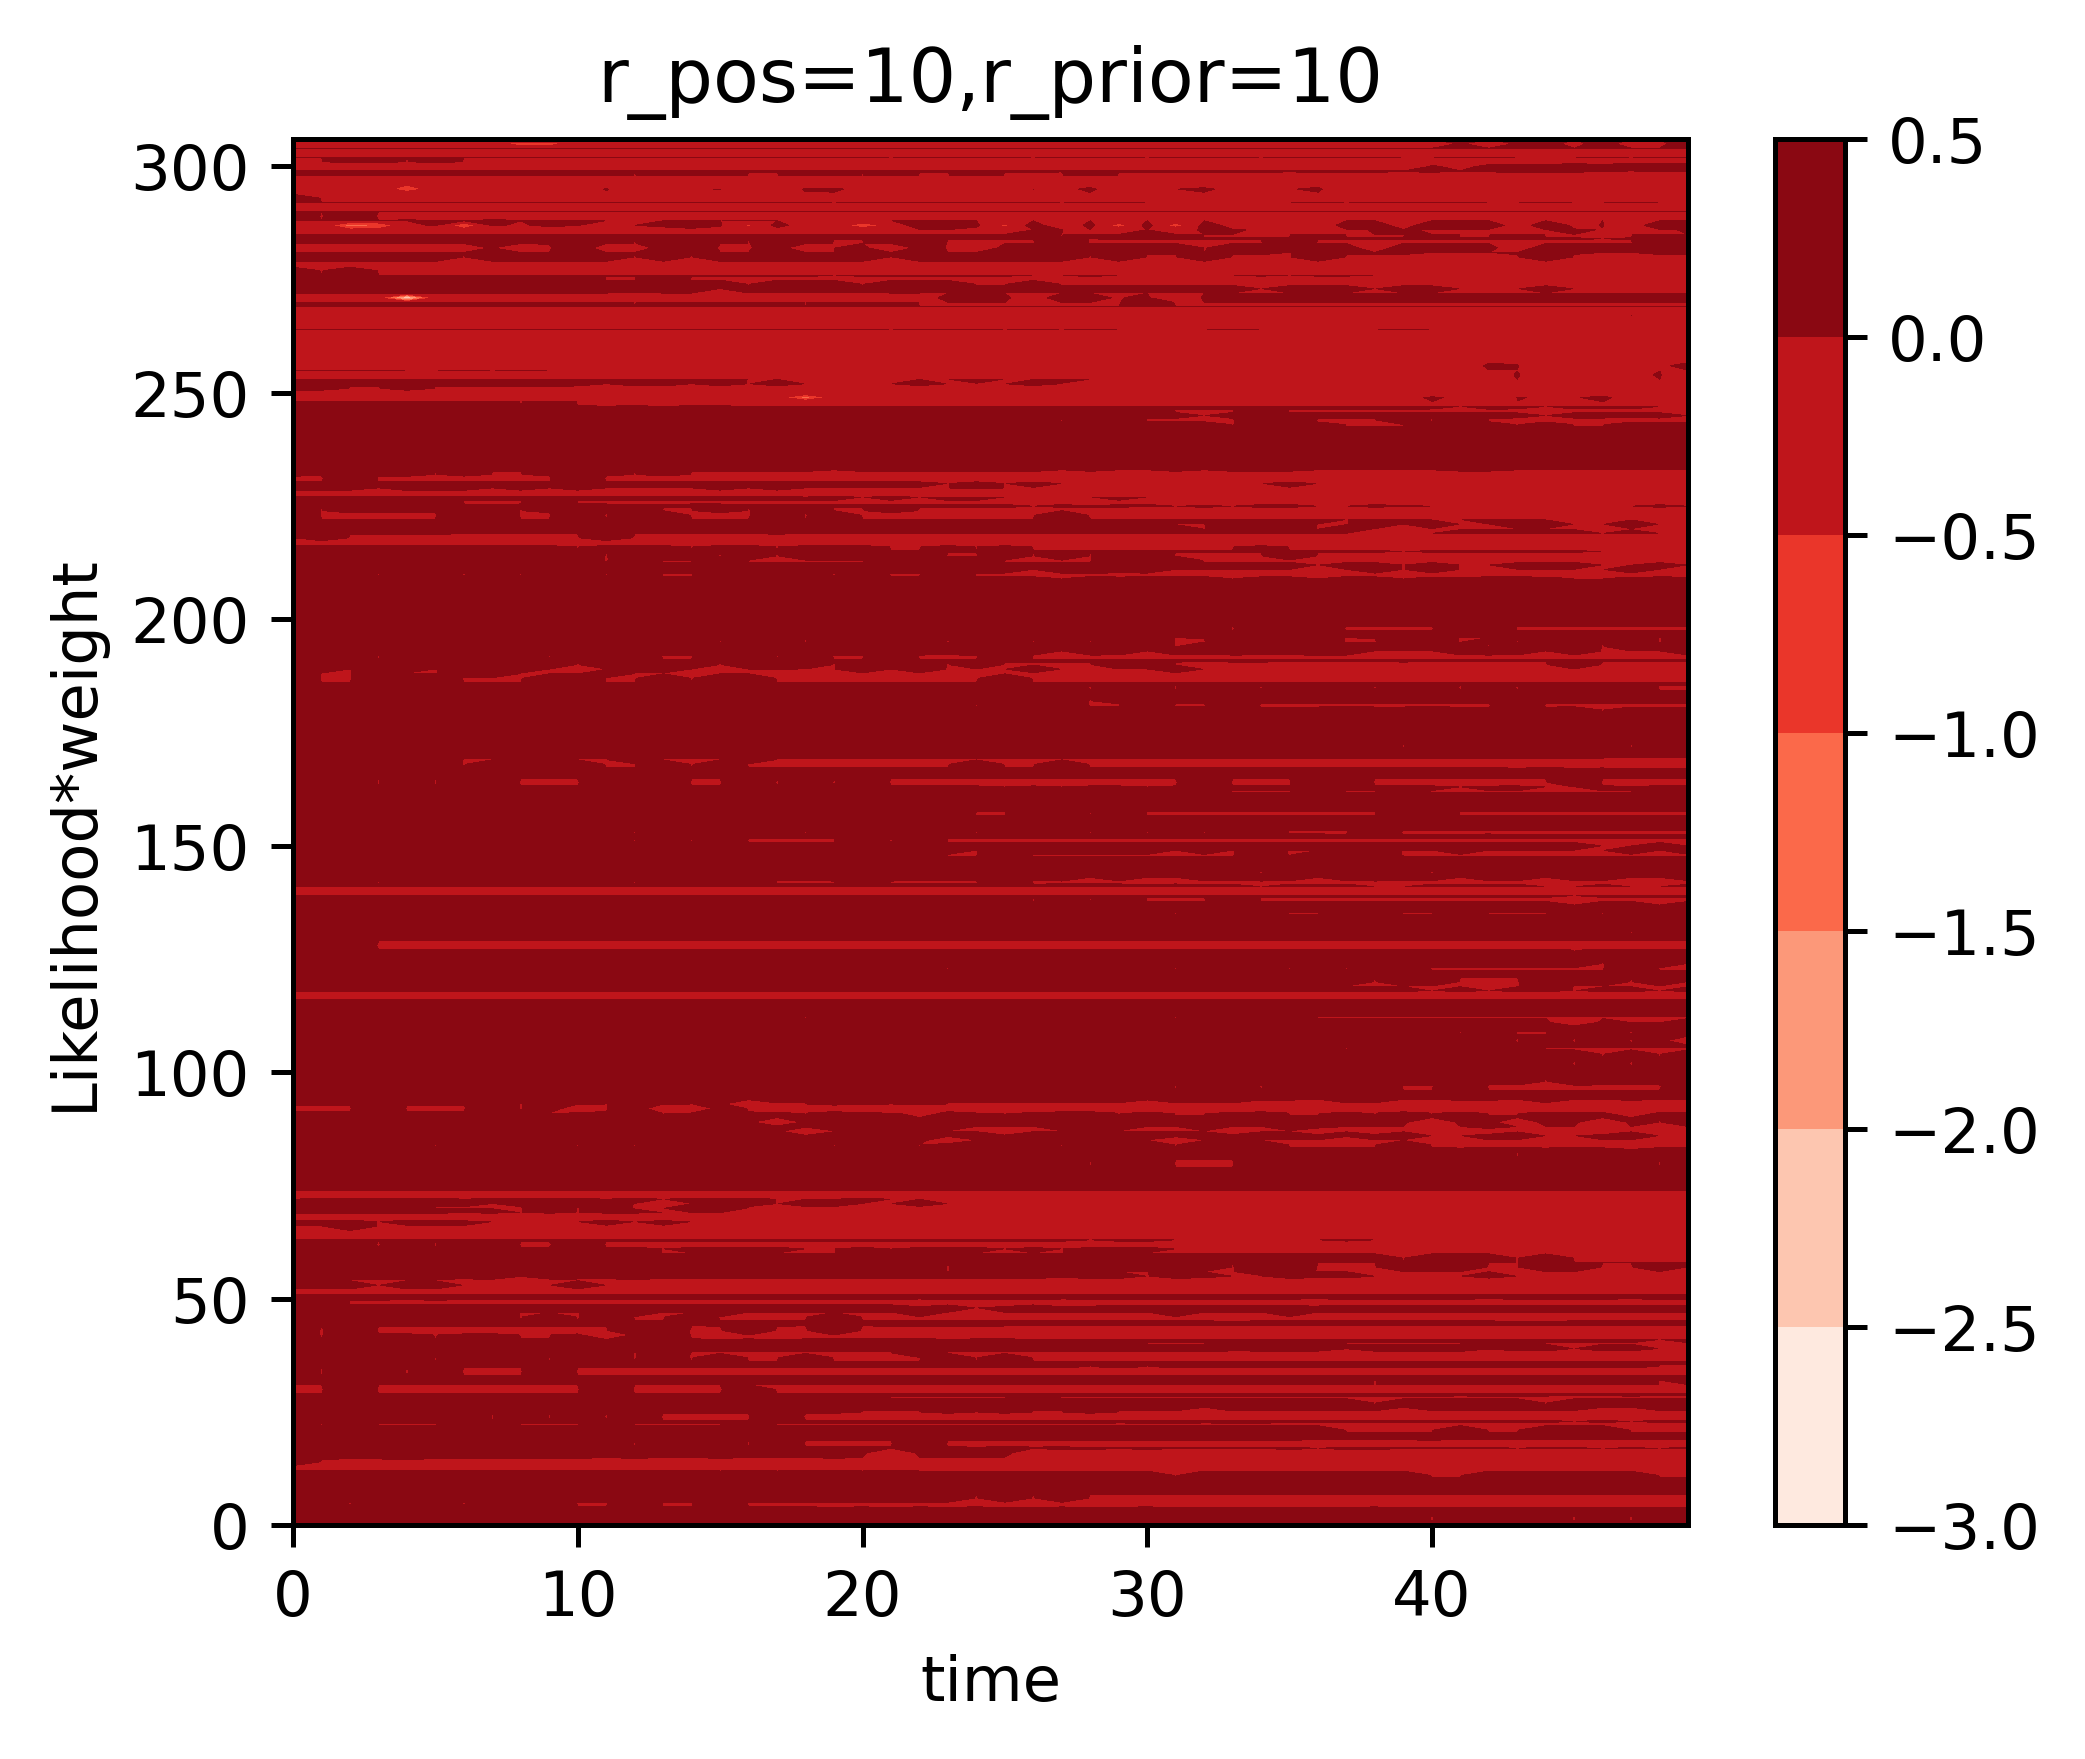

In [173]:
x = np.array(range(50))
y = np.array(range(307))

X, Y = np.meshgrid(x, y)

weight = (WN+WN2)[position,1858]
Z = m_log[:,10:] * weight[:,None]

fig1, ax2 = plt.subplots(figsize=(5, 4), dpi=450)
contour = ax2.contourf(X, Y, Z, cmap=plt.cm.Reds) #

cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
plt.xlabel('time')
plt.ylabel('Likelihood*weight')
plt.title('r_pos=10,r_prior=10')

In [174]:
R_loglikelihood_sum = np.zeros((9,300,9))
weight = (WN+WN2)[position,1858] ### different ranges
# R_loglikelihood_maxtrix = dict()
for r_idx in range(9):
    r = rs[r_idx]
    for e_i in range(300):
        observed_ts = Ensembles_log[r_idx,e_i,:,:]
        mle_matrix = observed_ts[position]
        for r_j in range(9):
            mean_r = M_r_logNewinfect_avg[r_j,position,:]
            std_r = M_r_logNewinfect_std[r_j,position,:]
        #     std_r_ma = mean_county_r*0.1+1
            M_likelihood = SSA.norm.pdf(mle_matrix, scale=std_r, loc=mean_r)
            M_likelihood[M_likelihood==0]=0.0000001
    #         R_loglikelihood_maxtrix[(r_idx,r_j)] = np.log(M_likelihood)
            R_loglikelihood_sum[r_idx, e_i, r_j] = np.sum(np.log(M_likelihood[:,10:])*weight[:,None])#

In [175]:
trues = np.zeros(9)
max_indices = np.zeros((9,300))
for ob_j in range(9):
    for e_i in range(300):
        est_j = np.argmax(R_loglikelihood_sum[ob_j,e_i])
        max_indices[ob_j,e_i] = est_j
#         est_j = max_indices[ob_j,e_i]
        if est_j == ob_j:
            trues[ob_j] = trues[ob_j]+1

In [176]:
R_loglikelihood_sum_ensemble_mean = np.mean(R_loglikelihood_sum,axis=1)

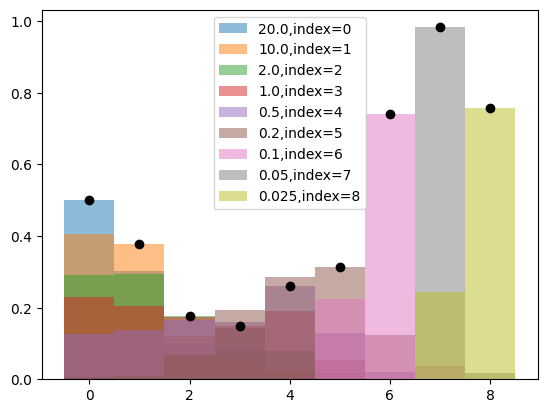

In [177]:
bin_edges = np.arange(-0.5, 9, 1) 
for j in range(9):
    plt.hist(max_indices[j],bins=bin_edges,density=True, label='{},index={}'.format(rs[j],j),alpha=0.5)
plt.legend()
plt.scatter(range(9),trues/300,color='black')

In [169]:
fig, axs = plt.subplots(2,4,figsize=(20,5))
for i in range(1,9):
    row = int((i-0.1)/4)
    col = int((i-0.1)%4)
    ax = axs[row,col]
    pos_le = - R_loglikelihood_sum_ensemble_mean[i,1:]
    mle = np.where(pos_le == np.min(pos_le))[0][0]
#     print(mle)
    r = rs[i]
    ax.scatter(range(1,9), R_loglikelihood_sum_ensemble_mean[i,1:],label = np.round(r,2),s=2)
    ax.axvline(mle+1, color='red',label='maxmise -log(likeli)')
#     ax.set_yscale('log')

#     ax.set_xticks(rs)
    ax.set_xticklabels(np.round(rs,3))
#     ax.set_xscale('log')
    
    
    ax.legend()
    
plt.show()

/var/folders/vx/g_l159t12yb63094n730n4pm0000gn/T/ipykernel_41985/3560710809.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(rs,3))


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data from a normal distribution
np.random.seed(0)
mu_true = 5.0
sigma = 2.0
data = np.random.normal(mu_true, sigma, size=100)

# Define the likelihood function for the normal distribution
def likelihood(mu, data, sigma):
    n = len(data)
    return -n/2 * np.log(2*np.pi*sigma**2) - np.sum((data - mu)**2) / (2*sigma**2)

# Generate values of mu for the profile
mus = np.linspace(mu_true - 3, mu_true + 3, 400)

# Calculate likelihood for each mu
likelihoods = [likelihood(mu, data, sigma) for mu in mus]

# Plot
plt.plot(mus, likelihoods)
plt.xlabel('μ')
plt.ylabel('Likelihood')
plt.title('Likelihood Profile')
plt.axvline(mu_true, color='red', linestyle='--', label="True μ")
plt.legend()
plt.show()
